# トレーニングとして、MNISTのネットワークを計算する。これは、chainerに含まれているデータそのものである。

In [1]:
from chainer.datasets import mnist
train_val,test = mnist.get_mnist(withlabel=True,ndim=1)

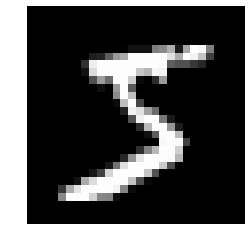

label: 5


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
x,t =train_val[0]
plt.imshow(x.reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()
print("label:",t)

データは通常、training,validation,testの三つに分割されていく。chainerにはその分割のための関数が含まれている。

In [4]:
from chainer.datasets import split_dataset_random
train,valid = split_dataset_random(train_val,50000,seed=0)
print(len(train))
print(len(valid))

50000
10000


iteratorとは学習データを束ねて学習モデルに渡す装置である。言ってしまえば、入力データを複数行ずつ分割する機能である。この分割されたデータセットをバッチ（ミニバッチ）と呼ぶ。また、全てのデータを学習し終えた時点のことを１エポックと呼ぶ。

In [5]:
from chainer import iterators
batchsize = 128
train_iter = iterators.SerialIterator(train,batchsize)
valid_iter = iterators.SerialIterator(valid,batchsize,repeat=False,shuffle=False)
test_iter = iterators.SerialIterator(test,batchsize,repeat=False,shuffle=False)

chainerにはパラメーターを持つ関数としてlink、持たない関数としてfunctionが用意されている。これを事前に用意しておくととっても便利。

In [10]:
import chainer
import chainer.links as Link
import chainer.functions as Func

128